In [20]:
using DelimitedFiles, Distributions, Plots

In [ ]:
function moments(::Type{Gamma}, mean::Real, var::Real)
    shape = mean^2 / var
    scale = var / mean
    return shape, scale
end

In [3]:
sunspot = readdlm("../data/SN_y_tot_V2.0.csv", ';')
select_1945_2020 = filter((s) -> s[1] > 1945 && s[1] < 2021, collect(eachrow(sunspot)))
observations = map((s) -> round(s[2]), select_1945_2020);

# to check that matched with Semih
cvi = readdlm("../estimations/cvi_sunspot_results.csv")
cvmp = readdlm("../estimations/cvmp_sunspot_results.csv")
aismp = readdlm("../estimations/ais_mp_sunspot_results.csv")
nuts = readdlm("../estimations/nuts_sunspot_results.csv");


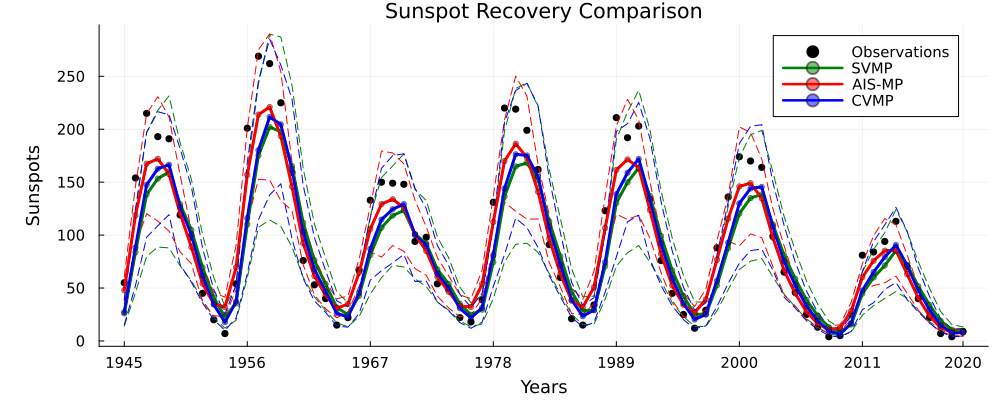

In [14]:
custom_colors = [:green, :red, :blue]
algorithms = ["SVMP", "AIS-MP", "CVMP"]
data_list = [cvi, aismp, cvmp]

estimation_plot = plot(title="Sunspot Recovery Comparison",
                       guidefontsize=12,
                       tickfontsize=10,
                       legendfontsize=10)

scatter!(estimation_plot, observations, color=:black, legend=:topright,
         xtick=([1, 12, 23, 34, 45, 56, 67, 76], [1945, 1956, 1967, 1978, 1989, 2000, 2011, 2020]),
         xlabel="Years", ylabel="Sunspots", label="Observations", left_margin=10Plots.mm, bottom_margin=5Plots.mm)

# Plot the confidence bounds as lines
for (i, (algorithm, data, color)) in enumerate(zip(algorithms, data_list, custom_colors))
    upper_bound = data[:, 1] .+ data[:, 2]
    lower_bound = data[:, 1] .- data[:, 2]
    plot!(estimation_plot, data[:, 1], label=false, lw=3, size=(1000, 400), color=color, linestyle=:solid)
    plot!(estimation_plot, upper_bound, label=false, lw=1, size=(1000, 400), color=color, linestyle=:dash)
    plot!(estimation_plot, lower_bound, label=false, lw=1, size=(1000, 400), color=color, linestyle=:dash)
end

# Plot the lines for each algorithm
for (i, (algorithm, data, color)) in enumerate(zip(algorithms, data_list, custom_colors))
    plot!(estimation_plot, data[:, 1], label=algorithm, lw=2, size=(1000, 400), color=color, marker=:circle, markersize=3, markeralpha=0.5)
end

estimation_plot

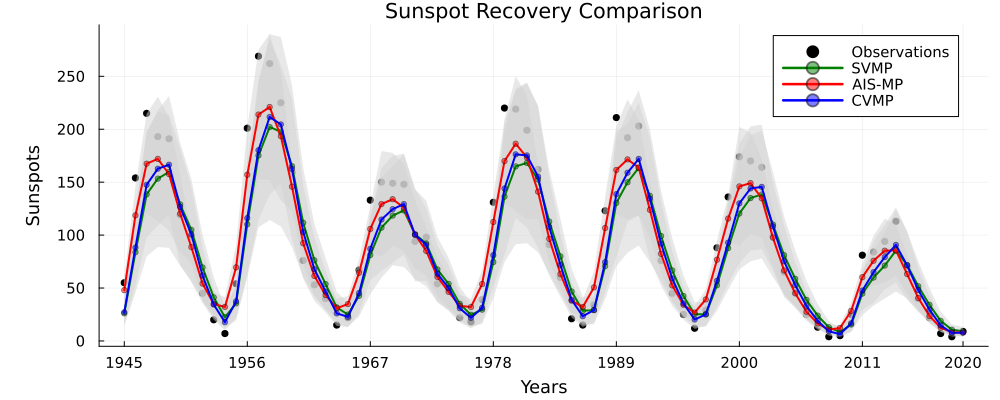

In [15]:
custom_colors = [:green, :red, :blue]
algorithms = ["SVMP", "AIS-MP", "CVMP"]
data_list = [cvi, aismp, cvmp]

estimation_plot = plot(title="Sunspot Recovery Comparison",
                       guidefontsize=12,
                       tickfontsize=10,
                       legendfontsize=10)

scatter!(estimation_plot, observations, color=:black, legend=:topright,
         xtick=([1, 12, 23, 34, 45, 56, 67, 76], [1945, 1956, 1967, 1978, 1989, 2000, 2011, 2020]),
         xlabel="Years", ylabel="Sunspots", label="Observations", left_margin=10Plots.mm, bottom_margin=5Plots.mm)

# Plot the confidence bounds using the same light gray color
for (i, (algorithm, data, color)) in enumerate(zip(algorithms, data_list, custom_colors))
    plot!(estimation_plot, data[:, 1], ribbon=data[:, 2], label="", lw=2, size=(1000, 400), color=:lightgray, fillalpha=0.5)
end

# Plot the lines for each algorithm
for (i, (algorithm, data, color)) in enumerate(zip(algorithms, data_list, custom_colors))
    plot!(estimation_plot, data[:, 1], label=algorithm, lw=2, size=(1000, 400), color=color, marker=:circle, markersize=3, markeralpha=0.5)
end
estimation_plot

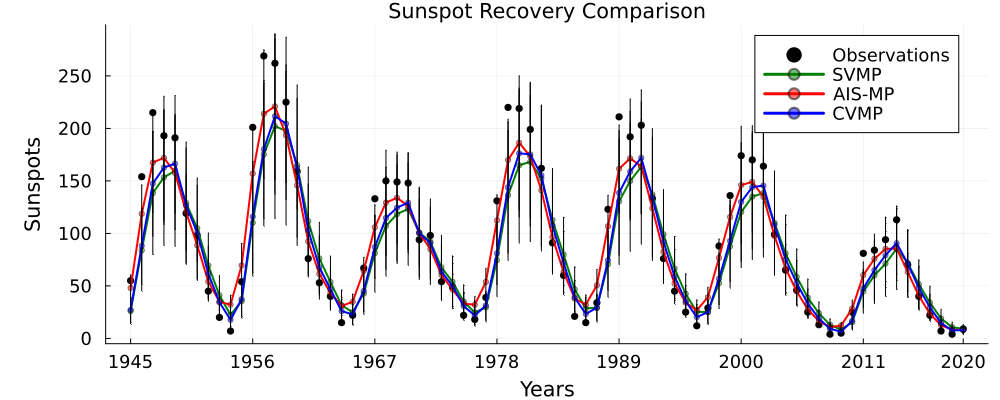

In [18]:
# Customize plot
custom_colors = [:green, :red, :blue]
algorithms = ["SVMP", "AIS-MP", "CVMP"]
data_list = [cvi, aismp, cvmp]

estimation_plot = plot(title="Sunspot Recovery Comparison",
                       guidefontsize=14,
                       tickfontsize=12,
                       legendfontsize=12,
                       legend=:topright)

scatter!(estimation_plot, observations, color=:black,
         xtick=([1, 12, 23, 34, 45, 56, 67, 76], [1945, 1956, 1967, 1978, 1989, 2000, 2011, 2020]),
         xlabel="Years", ylabel="Sunspots", label="Observations", left_margin=10Plots.mm, bottom_margin=5Plots.mm)

# Plot the algorithm lines and error bars
for (i, (algorithm, data, color)) in enumerate(zip(algorithms, data_list, custom_colors))
    plot!(estimation_plot, data[:, 1], label=algorithm, lw=2, size=(1000, 400), color=color, marker=:circle, markersize=3, markeralpha=0.5)
    scatter!(estimation_plot, data[:, 1], yerror=data[:, 2], label="", ms=0, color=color, marker=:circle, markersize=3, markeralpha=0.5)
end
estimation_plot

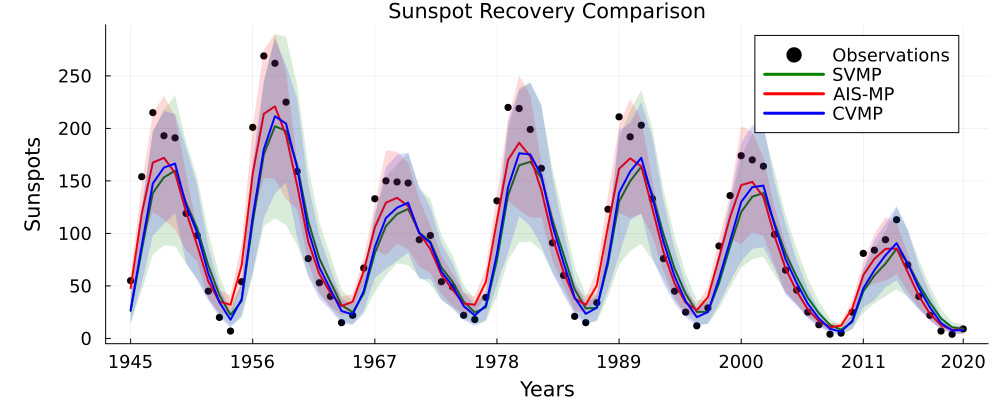

In [19]:
custom_colors = [:green, :red, :blue]
algorithms = ["SVMP", "AIS-MP", "CVMP"]
data_list = [cvi, aismp, cvmp]

estimation_plot = plot(title="Sunspot Recovery Comparison",
                       guidefontsize=14,
                       tickfontsize=12,
                       legendfontsize=12,
                       legend=:topright)

scatter!(estimation_plot, observations, color=:black,
         xtick=([1, 12, 23, 34, 45, 56, 67, 76], [1945, 1956, 1967, 1978, 1989, 2000, 2011, 2020]),
         xlabel="Years", ylabel="Sunspots", label="Observations", left_margin=10Plots.mm, bottom_margin=5Plots.mm)

for (i, (algorithm, data, color)) in enumerate(zip(algorithms, data_list, custom_colors))
    plot!(estimation_plot, data[:, 1], ribbon=data[:, 2], label=algorithm, lw=2, size=(1000, 400), color=color, fillalpha=0.15)
end

estimation_plot

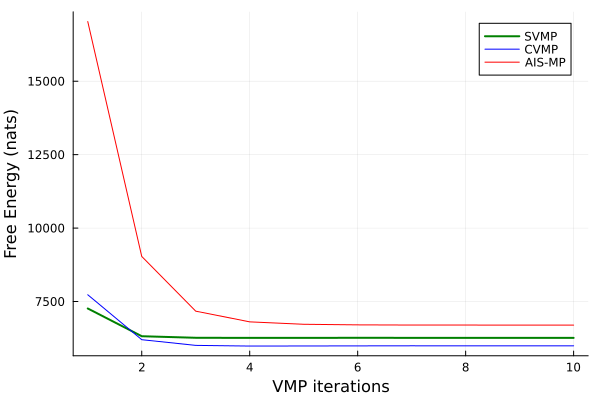

In [6]:
# to check that matched with Semih
cvi_fe = readdlm("../estimations/cvi_fe_sunspot_results.csv")
cvmp_fe = readdlm("../estimations/cvmp_fe_sunspot_results.csv")
aismp_fe = readdlm("../estimations/ais_mp_fe_results.csv")

fe_plot = plot(cvi_fe[1, :], lw=2, xlabel="VMP iterations", ylabel="Free Energy (nats)", color = :green, label = "SVMP")
plot!(cvmp_fe[1, :], color = :blue, label= "CVMP")
plot!(aismp_fe[1, :], color = :red, label = "AIS-MP")

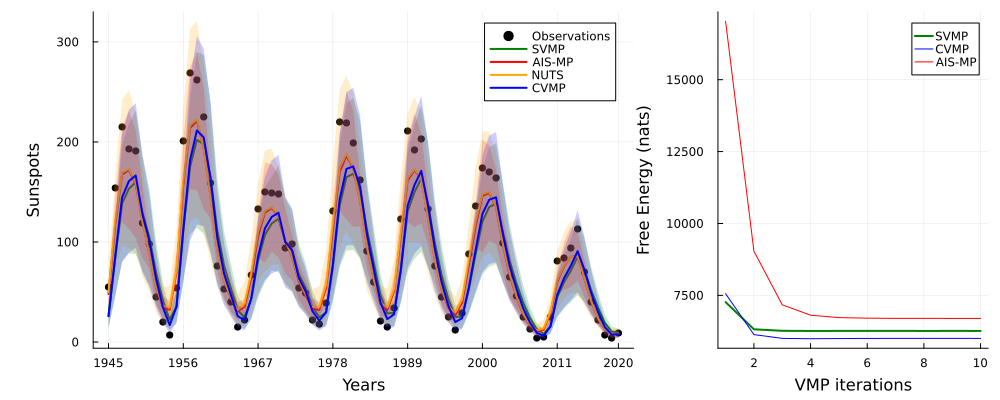

In [57]:
plot(estimation_plot, fe_plot, layout=grid(1, 2, widths=(2/3,1/3)))